C:\Users\junai\AppData\Local\Temp\ipykernel_2120\2329807915.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


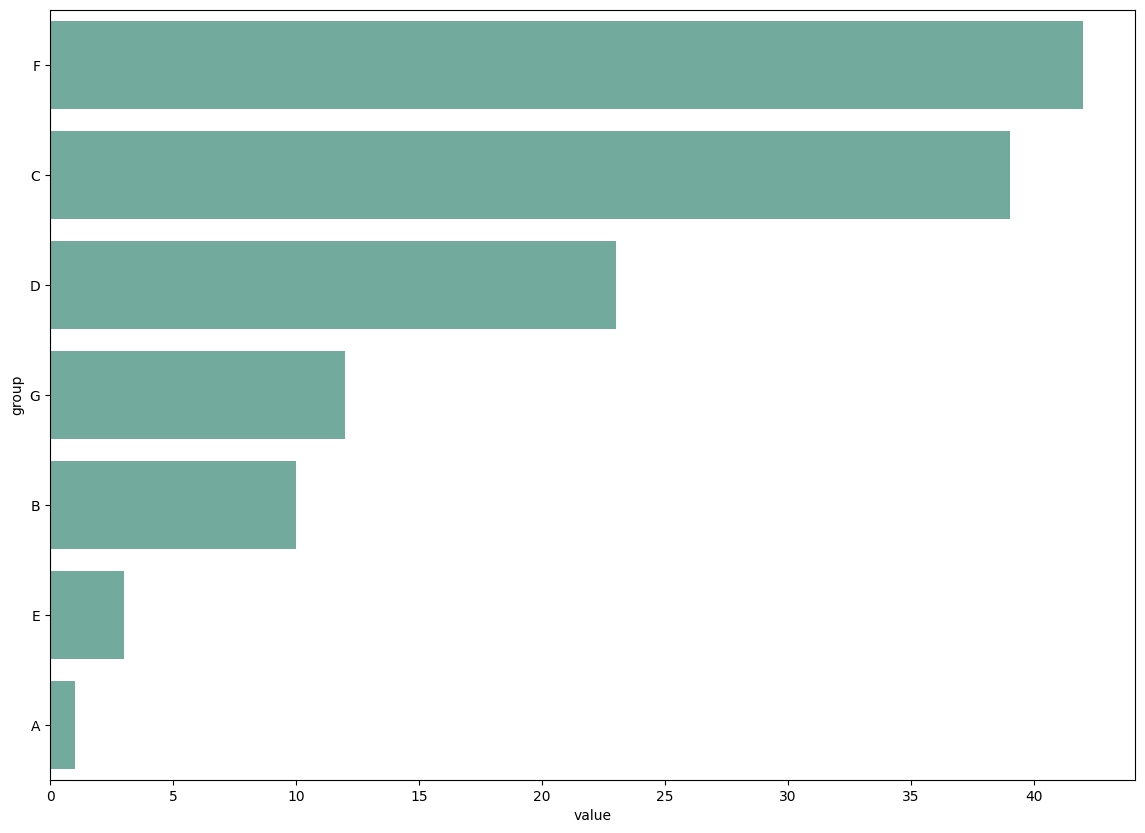

In [2]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt     

# Create a dataframe
import pandas as pd
df = pd.DataFrame({
        'group': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
        'value': [1, 10, 39, 23, 3, 42, 12]
})

# Set the figure size
plt.figure(figsize=(14, 10))

# Reorder this data frame
df = df.sort_values(['value'], ascending=False).reset_index(drop=True)

# Make a barplot
sns.barplot(
    x="value", 
    y="group", 
    data=df, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
);

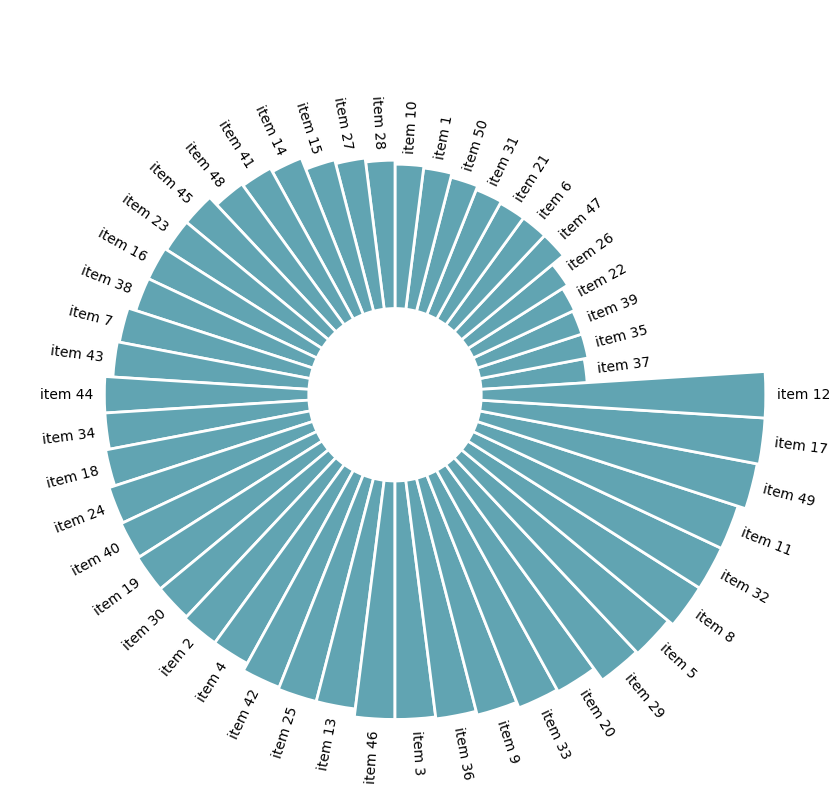

In [3]:
# import pandas for data wrangling
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Build a dataset
df = pd.DataFrame(
        {
            'Name': ['item ' + str(i) for i in list(range(1, 51)) ],
            'Value': np.random.randint(low=10, high=100, size=50)
        })

# Reorder the dataframe
df = df.sort_values(by=['Value'])

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["Name"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 